In [ ]:
from PIL import Image
import numpy as np
from skimage import data
import random
import math
import statistics as stats

# Retreiving the RGB coordinates for the image in np array
def load_image(path):
    image = Image.open(path)
    # Usually normalize to [0,1]
    return np.asarray(image) / 255

# Function to calculate new centroid by performing mean of features
def find_new_k(data):
    new_k = []
    for label in data:
        if len(label) > 0:
            x_mean = stats.mean([elem[0] for elem in label])
            y_mean = stats.mean([elem[1] for elem in label])
            z_mean = stats.mean([elem[2] for elem in label])
            new_k.append([x_mean, y_mean, z_mean])
    return new_k

# Function to find closest centroid for each point
def find_closest_centroids(X, centroids):
    x_size = len(X)
    c = np.zeros(x_size)
    for i in range(x_size):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        # Assign closest cluster to c[i]
        c[i] = np.argmin(distances)
    # Return the np array containing index of the closest centroid/color
    return c

# Function to implement k-means clustering
def k_means(x, K, n_init):
    # x: input data
    # K: number of centroids or clusters
    # n_init: the number of initial guesses for the centroids
    
    labels = [set() for i in range(1,K+1)]
    x_size = len(x)
    
    # rand number for init centroids,
    i = 0

    new_centroid_vals = []
    centroid_values = []
    for n in range(n_init):
        i += 1
        print(f'step {i}')
        
        # Below will be executed only once per K
        if not new_centroid_vals:
            # Initialise the centroids with random number
            rand_num_from_x = [random.randint(0, x_size - 1) for i in range(K)] 
            # Initialise centroid for K clusters
            centroid_values = [x[rand_num_from_x[i]] for i in range(len(rand_num_from_x))] 
        else:
            # If the centroids converge
            if np.array_equal(new_centroid_vals,centroid_values):
                print('Ending..')
                return new_centroid_vals, labels
            else:
                # If the centroid do not converge then assign new centroid value to current one and proceed further
                centroid_values = new_centroid_vals

        # Get euclidean distance of N points from centroid and assign point to the closest centroid
        #c = np.zeros(x_size)
        for x_i in x_data:
            eucid_d_x_i_centroids = []
            for cen_i in centroid_values:
                eucid_d = math.sqrt((cen_i[0] - x_i[0]) ** 2 + (cen_i[1] - x_i[1]) ** 2 + (cen_i[2] - x_i[2]) ** 2 )
                eucid_d_x_i_centroids.append(eucid_d)
            
            closet_c_to_xi = np.argmin(eucid_d_x_i_centroids)
            labels[int(closet_c_to_xi)].add((x_i[0], x_i[1], x_i[2]))
            
        new_centroid_vals = find_new_k(data=labels)
    return centroid_values,labels  # Returning Centroid and indexes

# Initalise variables K(number of clusters, init_value, number of dimensions/features.
init_val = 20     #n_init: the number of initial guesses for the centroids
K=80              # K - Number of clusters/centroids
num_of_features=3 # For RGB number of features = 3

# Load the image
image = load_image("bird.jpg")
#image = np.asarray(data.chelsea()) / 255

w, h, d = image.shape
print('Image found with width: {}, height: {}, depth: {}'.format(w, h, d))

# Reshaping it or flattening it into a 2d matrix 
x_data = image.reshape((w * h, d))

colors, labels = k_means(x_data, K, init_val) 

# Indexes for color for each pixel
index = find_closest_centroids(x_data, colors)
index = np.array(index, dtype=np.uint8)

#Converting to column vector
colors=np.array(colors).reshape(K,num_of_features)

#Reshaping from 2d to 3d
X_new = np.array(colors[index, :] * 255, dtype=np.uint8).reshape((w, h, d))

comp_image = Image.fromarray(X_new)

# Save reconstructed image to disk
comp_image.save('comp_image.png')




Image found with width: 333, height: 500, depth: 3
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15



Original Image having file size of 134 KB
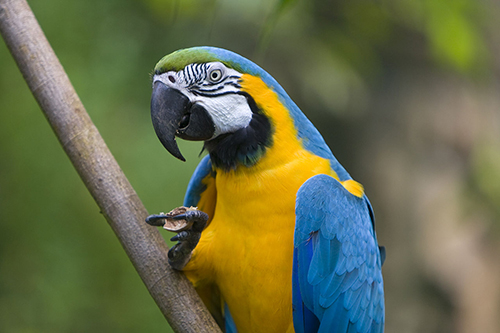

For K=10, image size on file reduced from 134KB to 30KB
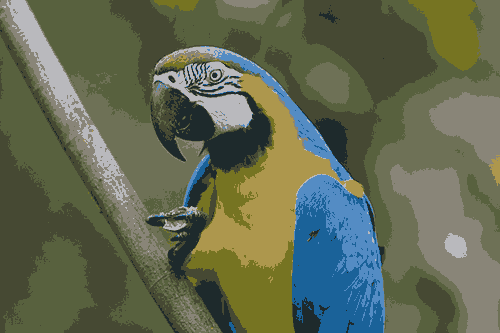

For K=20, image size on file reduced from 134KB to 46KB
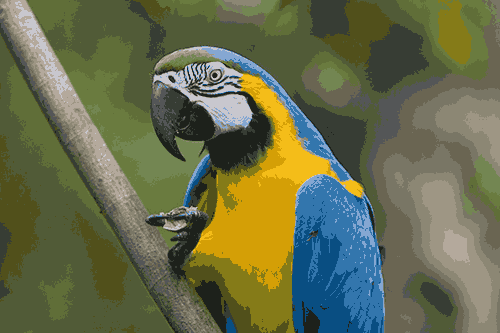

For K=40, image size on file reduced from 134KB to 67KB
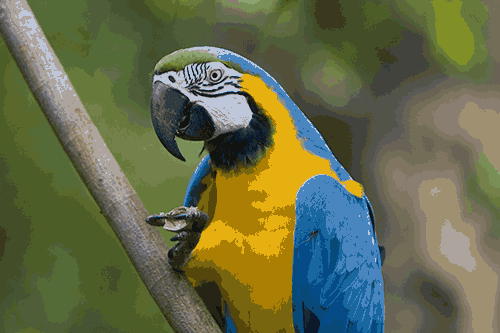


Using K-means algorithm, we reduce the number of colors depicting an image. As we can see for k=10,20,40 the number of colors reduces from 256 to 10,20,40 and entire image is represented using those 10,20,40 colors and so on respectively. Each pixel uses 3 bytes for represent an image. If we use the entire color palette then the total number of unique values would be 3* 256. However, if we reduce the colors to 10,20,40,... then the values will also reduce to 3*10, 3*20 and 3*40 and so on. 
